In [19]:
from src.spread_models.dry_forest import calc_spotting_distance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ros = np.arange(50, 400, 10)
df = pd.DataFrame(data=ros, columns=['ROS'])
df.head()

,ROS
0,50
1,60
2,70
3,80
4,90


In [3]:
u10 = 25
FHS_s = 3.5

In [4]:
df['spotting'] = calc_spotting_distance(df.ROS,u10,FHS_s)
df

,ROS,spotting
0,50,50.000000
1,60,50.000000
2,70,50.000000
3,80,50.000000
4,90,50.000000
5,100,50.000000
6,110,50.000000
7,120,50.000000
8,130,50.000000
9,140,50.000000


In [35]:
df['c1'] = 176.969*(np.arctan(FHS_s)*np.power(df.ROS/np.power(u10,0.25),0.5))
df['c2'] = 1568800*(np.power(FHS_s,-1)*np.power(df.ROS/np.power(u10,0.25),-1.5))
df['c1+c2']= df.c1+df.c2

In [23]:
df

,ROS,spotting,c1,c2,c1+c2
0,50,50.000000,1081.606105,4239.084103,5320.690209
1,60,50.000000,1184.840124,3224.780537,4409.620661
2,70,50.000000,1279.773602,2559.057119,3838.830721
3,80,50.000000,1368.135529,2094.556400,3462.691929
4,90,50.000000,1451.126866,1755.348188,3206.475054
5,100,50.000000,1529.622023,1498.742558,3028.364581
6,110,50.000000,1604.281112,1299.086327,2903.367439
7,120,50.000000,1675.616973,1140.132093,2815.749066
8,130,50.000000,1744.037440,1011.141676,2755.179117
9,140,50.000000,1809.873185,904.763321,2714.636506


<AxesSubplot:title={'center':'Variation in spotting distance with ROS when U10=25 and FHS_s= 3.5'}, xlabel='ROS', ylabel='[spotting]'>

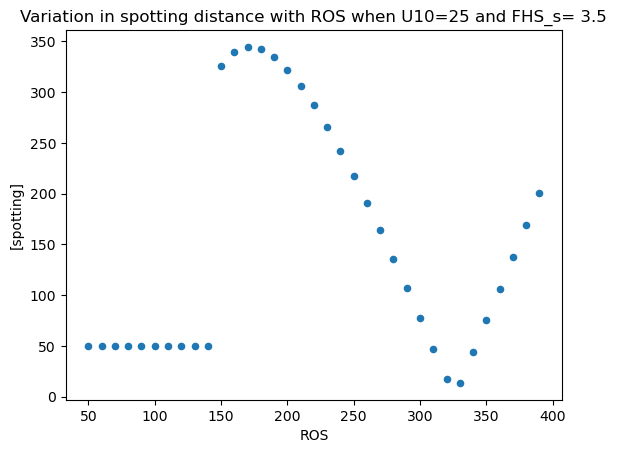

In [14]:
df.plot.scatter(
    x='ROS', 
    y=['spotting'], 
    title="Variation in spotting distance with ROS when U10=25 and FHS_s= 3.5",
    # subplots=True,
    # sharex=True
    )

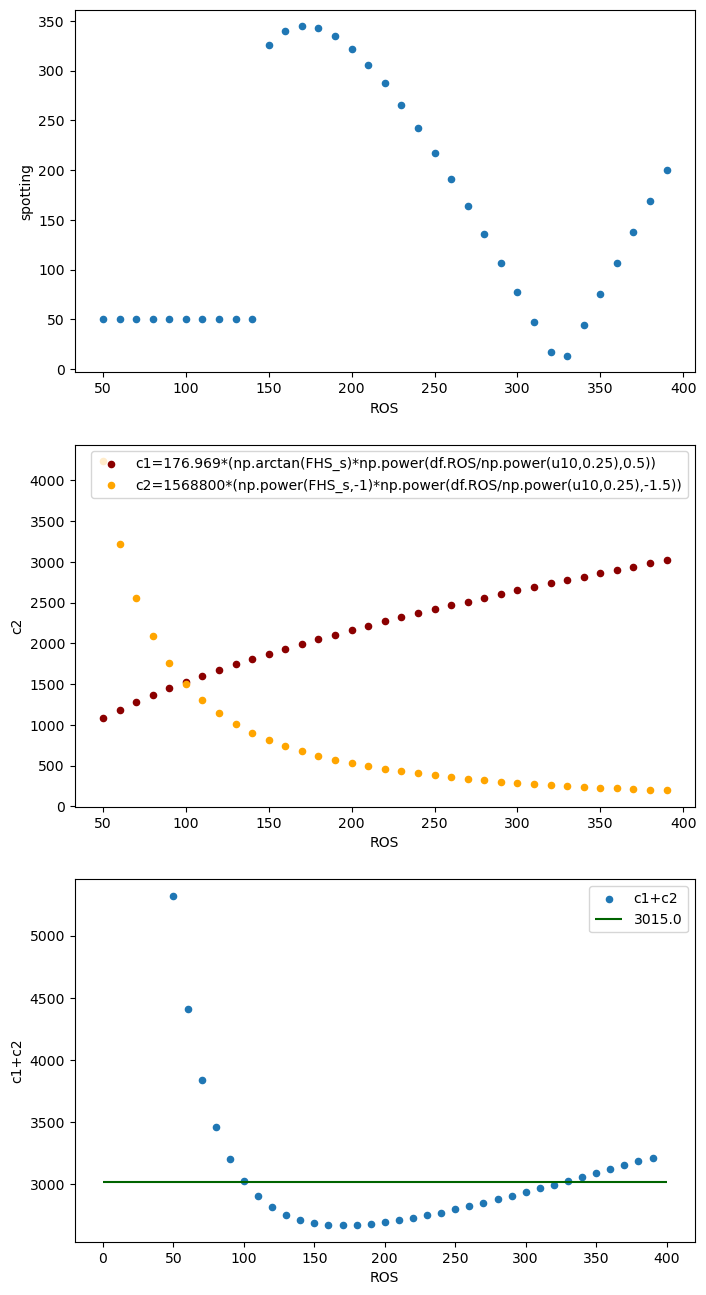

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1,figsize=(8, 16))

df.plot.scatter(x='ROS', y='spotting', ax=ax1)
df.plot.scatter(x='ROS', y='c1', ax=ax2, label='c1=176.969*(np.arctan(FHS_s)*np.power(df.ROS/np.power(u10,0.25),0.5))', color='darkred')
df.plot.scatter(x='ROS', y='c2', ax=ax2, label='c2=1568800*(np.power(FHS_s,-1)*np.power(df.ROS/np.power(u10,0.25),-1.5))', color='orange')
df.plot.scatter(x='ROS', y='c1+c2', ax=ax3, label='c1+c2')

ax3.hlines(y=3015.09, xmin=0, xmax=400, color='darkgreen', label='3015.0')

plt.legend()
plt.show()